# Content list
1. Import librarires
2. Import data
3. Visualizations
4. Descriptive findings
5. Exploratory analysis

# 01. Import libraries

In [1]:
# Import analysis and visualization libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import data

In [2]:
# Create path
path = r'C:\Users\adrig\OneDrive\Documentos\CARRIERFOUNDRY\DATA IMMERSION\ACHIEVEMENT 4\Ex_4.2_Python\03-2025 Instacart Basket Analysis'

In [3]:
path

'C:\\Users\\adrig\\OneDrive\\Documentos\\CARRIERFOUNDRY\\DATA IMMERSION\\ACHIEVEMENT 4\\Ex_4.2_Python\\03-2025 Instacart Basket Analysis'

In [4]:
# Import data
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [5]:
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,new_customer,product_id,add_to_cart_order,reordered,...,spending_flag,days_last_order_median,frequency_flag,gender,state,age,customer_since,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423


# 03. Visualizations

## 03.1 Bar Chart

In [5]:
# Map numbers to day names (starting from Saturday) 
days_map = { 
    0: 'Sat',
    1: 'Sun',
    2: 'Mon',
    3: 'Tue',
    4: 'Wed',
    5: 'Thu',
    6: 'Fri'
}

# Count and sort by index
day_counts = ords_prods_all['orders_day_of_week'].value_counts().sort_index()
day_counts.index = day_counts.index.map(days_map)

Text(0, 0.5, 'Number of Orders')

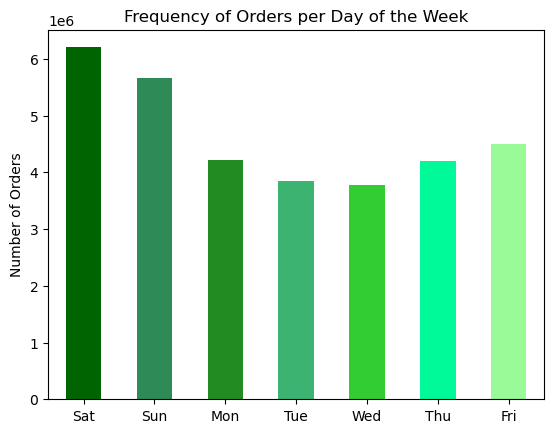

In [6]:
# Create bar chart
bar =day_counts.plot.bar(color = ['darkgreen', 'seagreen', 'forestgreen', 'mediumseagreen', 'limegreen', 'mediumspringgreen', 'palegreen'], rot = 0)

# Add title and axis labels
bar.set_title('Frequency of Orders per Day of the Week')
bar.set_xlabel('')
bar.set_ylabel('Number of Orders')

In [7]:
# Export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

## 03.2 Histogram

Text(0, 0.5, '')

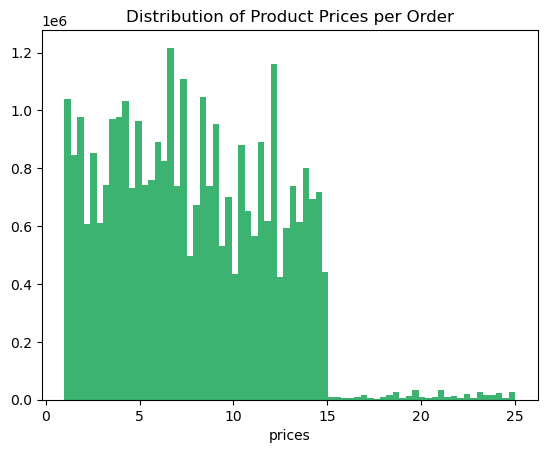

In [8]:
# Create a histogram of 'prices' column
hist = ords_prods_all['prices'].plot.hist(bins = 70, color ='mediumseagreen')

# Add title and axis labels
hist.set_title('Distribution of Product Prices per Order')
hist.set_xlabel('prices')
hist.set_ylabel('')

In [25]:
# Export histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

## 03.3 Scatterplot

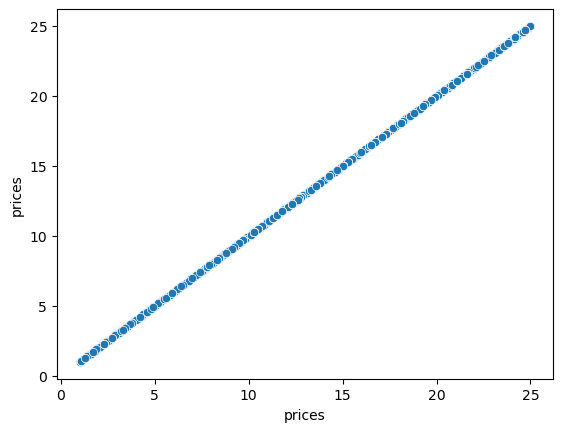

In [26]:
# Create a scatterplot of prices 
splot = sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_all)
plt.show()

## 03.4 Line chart 

In [9]:
# Create a sample 70/30
np.random.seed(4) # reproducible pattern 
dev = np.random.rand(len(ords_prods_all)) <= 0.7 # new list to store boolean values 
dev

array([False,  True, False, ...,  True,  True,  True])

In [10]:
# Create both samples
big = ords_prods_all[dev]
small = ords_prods_all[~dev]

In [12]:
len(ords_prods_all)

32404859

In [13]:
# Should be the same size as the len from ords_prods_all
len(big) + len(small)

32404859

In [14]:
# Create a new subset with only the necessary columns
df = small[['orders_day_of_week', 'prices']]

In [15]:
df.head()

,orders_day_of_week,prices
0,2,9.0
2,2,4.4
3,2,4.7
6,3,3.0
10,3,4.0


([<matplotlib.axis.XTick at 0x2007756f800>,
 [Text(0, 0, 'Sat'),
  Text(1, 0, 'Sun'),
  Text(2, 0, 'Mon'),
  Text(3, 0, 'Tue'),
  Text(4, 0, 'Wed'),
  Text(5, 0, 'Thu'),
  Text(6, 0, 'Fri')])

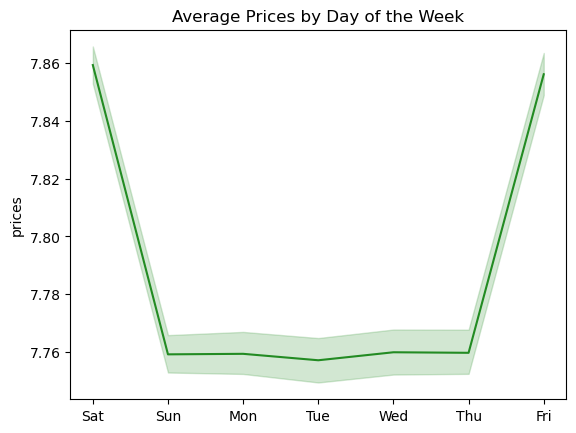

In [17]:
# Create a line chart using the small sample 'df'
line = sns.lineplot(data = df, x = 'orders_day_of_week', y = 'prices', color = 'forestgreen')
# Set a title
plt.title('Average Prices by Day of the Week')
# Remove x label
plt.xlabel('')
# Replace x-axis with day names
plt.xticks(ticks=range(7), labels=['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'])

In [18]:
# Export line chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_orders_dow_prices.png'))

# 04. Descriptive findings 

## 04.1 Frequency of orders places by hour of the day  

Text(0, 0.5, '')

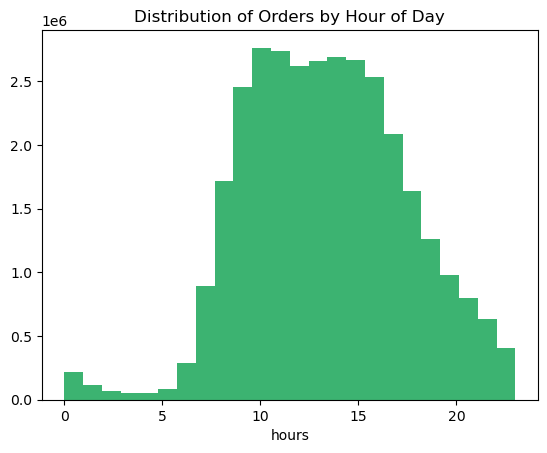

In [20]:
# Create a histogram of column order_hour_of_day
hist_hour = ords_prods_all['order_hour_of_day'].plot.hist(bins = 24, color = 'mediumseagreen')

# Add title and axis labels
hist_hour.set_title('Distribution of Orders by Hour of Day')
hist_hour.set_xlabel('hours')
hist_hour.set_ylabel('')

The histogram shows that most orders are placed in the range between 9 and 15 hours. Few orders are placed between  23-6. A step increase in orders starts around 7-9. Orders placing decreases gradually from after 15 hours.  

In [21]:
# Export histogram
hist_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_hour_of_day_hist.png'))

## 04.2 Distribution of orders among customers in terms of loyalty 

Text(0, 0.5, 'Number of Orders')

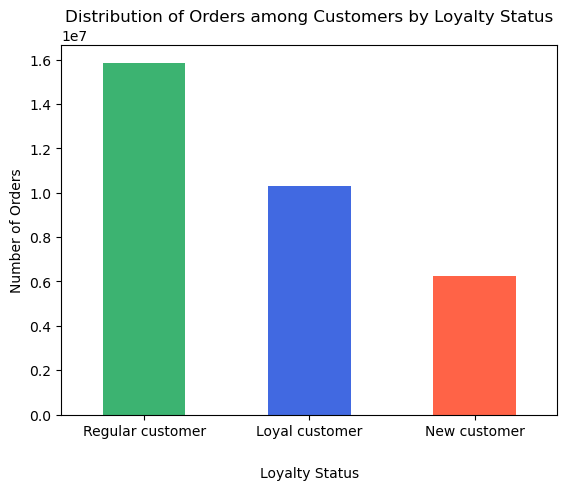

In [26]:
# Create a bar chart from 'loyalty_flag' column
bar_loyalty = ords_prods_all['loyalty_flag'].value_counts().plot.bar(color = ['mediumseagreen','royalblue', 'tomato'], rot=0)

# Add title and axis labels
bar_loyalty.set_title('Distribution of Orders among Customers by Loyalty Status')
bar_loyalty.set_xlabel('Loyalty Status', labelpad=20)
bar_loyalty.set_ylabel('Number of Orders')

The majority of customers are regular customers followed by loyal customers, which suggests that Instacart has a strong market. New customers are the smallet group which suggests that there is a lower number of new users or they haven't placed orders very often. 

In [27]:
# Export bar chart
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_flag_bar.png'))

## 04.3 Difference in expenditure

In [29]:
# Create a sample dataset to create a line chart using previous sample 
df_2 = small[['order_hour_of_day', 'prices']]
df_2.head()

,order_hour_of_day,prices
0,8,9.0
2,8,4.4
3,8,4.7
6,7,3.0
10,7,4.0


Text(0.5, 0, 'hour of day')

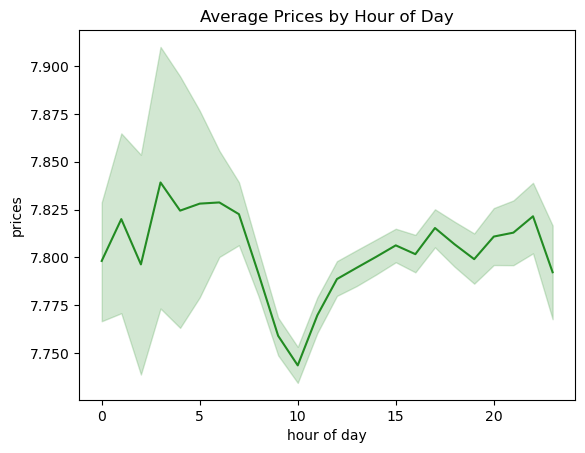

In [30]:
# Create a line chart
line_hour = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices', color = 'forestgreen')
# Set a title
plt.title('Average Prices by Hour of Day')
# Rename x-label
plt.xlabel('hour of day')

In [31]:
# Expor line bar
line_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_hour_prices_line.png'))

Products prices decresase sharply between 9-10. 
Prices are more stable during the afternoon, increasing gradually from 10 to 21 hours and decrease again until midnight.
The highest variability is from midnight to 6 am, where prices start to decrease. 

# 05. Exploratory Analysis

## 05.1 Connection between age and family situation

In [33]:
# First create a subset with the sample that includes age and n_dependants
df_3 = small[['age', 'n_dependants']]
df_3.head()

,age,n_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


Text(0, 0.5, 'number of dependants')

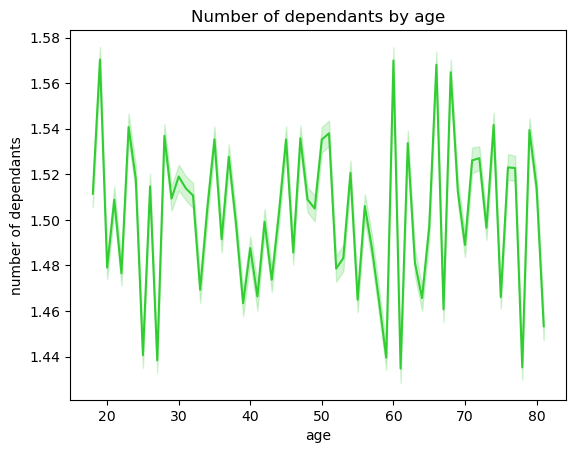

In [34]:
# Create a linechart
line_age = sns.lineplot(data = df_3, x = 'age', y = 'n_dependants', color = 'limegreen')
# Set a title
plt.title('Number of dependants by age')
# Rename y label
plt.ylabel('number of dependants')

There's no clear pattern between both variables.

In [35]:
# Expor line bar
line_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_dependants_line.png'))

## 05.2 Connection between age and spending power

<Axes: title={'center': 'Correlation between customer age and income'}, xlabel='age', ylabel='income'>

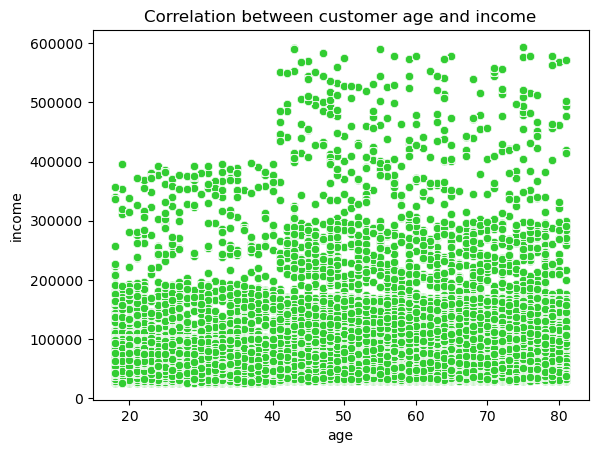

In [36]:
# Create a scatterplot of age and income
splot_age = sns.scatterplot(x = 'age', y = 'income', data = ords_prods_all, color = 'limegreen')
plt.title('Correlation between customer age and income')
splot_age

There is no clear pattern between age and income. The highest incomes are in people aged 40+

In [37]:
# Expor line bar
splot_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_income_splot.png'))